In [1]:
from Tools.FitnessFunction import Convolution, SensorEvaluator
from Tools.MapLoader import MapLoader
from Tools.PlotTools import VisualTool
from OuterDeployment.HarrisCorner import HarrisCorner

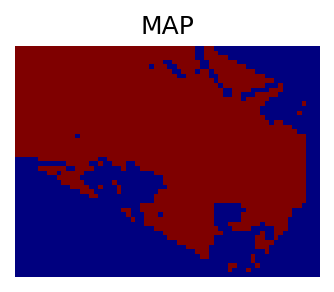

In [2]:
MAP = MapLoader(map_name="map_280x250.bot").load()
vis = VisualTool(save_dir="__RESULTS__", save=False, show=True, size=(3,2))
vis.showJetMap(map_data=MAP)

In [3]:
corners = HarrisCorner(MAP=MAP).run(map=MAP)
print(corners)
print(len(corners))

[(45, 1), (54, 8), (54, 14), (59, 17), (17, 25), (31, 29), (14, 30), (28, 34), (44, 34), (49, 38), (43, 39), (56, 40), (40, 44)]
13


In [4]:
fitness = SensorEvaluator(map=MAP, corner_points=corners, sensor_points=[])

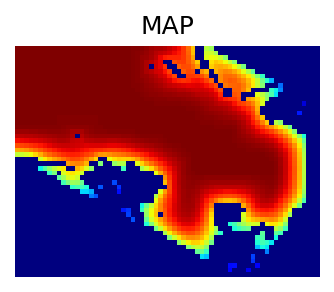

In [5]:
activation_map = fitness._activation_map_()
vis.showJetMap(activation_map)

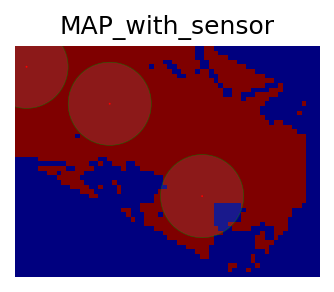

[(array([20, 12]), 251.75442504882812),
 (array([40, 32]), 202.94873046875),
 (array([2, 4]), 134.999267578125)]

In [6]:
inners = [(2,4), (40, 32),  (20, 12)]
vis.showJetMap_circle(map_data=MAP, sensor_positions=inners)
fitness.rankSensors(MAP=MAP, sensor_points=inners)

44.45026178010471


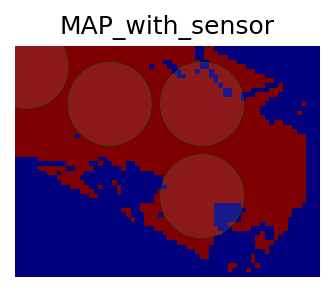

In [7]:
inners = [(2,4), (40, 32),  (20, 12), (40, 12)]
print(fitness.fitnessFunc(MAP=MAP, sensor_list=inners, coverage=45))
vis.showJetMap_circle(map_data=MAP, sensor_positions=inners)

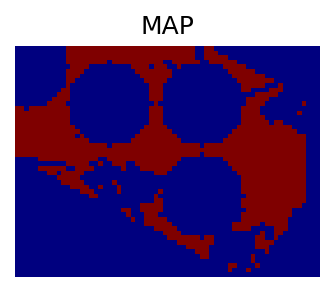

In [8]:
fitness.extractUncovered(MAP=MAP, sensor_list=inners, coverage=45)
uncovered = fitness.uncoveredMAP(MAP=MAP, sensor_list=inners, coverage=45)
vis.showJetMap(map_data=uncovered)